<a href="https://colab.research.google.com/github/0had0/AI-Journey/blob/main/Lebanese_Lottery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiThread Scrapper

In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
from urllib.request import Request, urlopen
import pandas as pd
from multiprocessing.pool import ThreadPool
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

sns.set(rc={'figure.figsize':(11,8)})
sns.color_palette("rocket")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

plt.rcParams["axes.grid"] = False

In [2]:
def df_loops(index):
  my_url = 'https://www.lldj.com/en/LatestResults/Loto?draw='+str(index)

  req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})
  uClient = uReq(req)
  page_html = uClient.read()
  uClient.close()

  page_soup = soup(page_html, "html.parser")
  draw_info = page_soup.findAll("span",{"class":"yellow"})
  draw_date = draw_info[0].text
  draw_date = draw_date.split(" ")
  draw_date = draw_date[3]
  draw_date = draw_date.split("/")
  draw_jackpot = draw_info[1].text
  day = draw_date[0]
  month = draw_date[1]
  year = draw_date[2]
  loto_balls_container = page_soup.findAll("ul",{"class":"list ballslist pseudoclear"})
  loto_balls = loto_balls_container[0].find_all("li")
    
  row = {
      'Draw Number': index,
      'Date': year + "-" + month + "-" + day,
      'Jackpot': draw_jackpot,
      'Ball 1': loto_balls[0].text,
      'Ball 2': loto_balls[1].text,
      'Ball 3': loto_balls[2].text,
      'Ball 4': loto_balls[3].text,
      'Ball 5': loto_balls[4].text,
      'Ball 6': loto_balls[5].text,
      'Extra Ball': loto_balls[6].text,
  }

  return pd.Series(row)

In [3]:
def get_max_index():
  loto_url = 'https://www.lldj.com/en/LatestResults/Loto'

  req = Request(loto_url, headers={'User-Agent': 'Mozilla/5.0'})
  uClient = uReq(req)
  page_html = uClient.read()
  uClient.close()

  page_soup = soup(page_html, "html.parser")
  draw_info = page_soup.find("input",{"id":"resultdateinput"})

  return int(draw_info['value'])

In [4]:
CONFIG = {
    'THREAD_COUNT': 300
}

In [5]:
def main(CONFIG=CONFIG):
  THREAD_COUNT = CONFIG['THREAD_COUNT']

  draws = get_max_index()

  loto_scrap = pd.DataFrame(columns = ['Draw Number','Jackpot','Date',"Ball 1","Ball 2","Ball 3","Ball 4","Ball 5","Ball 6","Extra Ball"])

  start_index = 1
  
  for end_index in range(THREAD_COUNT + 1, draws, THREAD_COUNT):
    print("proccessing indexes [{}, {}]".format(start_index, end_index))
    with ThreadPool(THREAD_COUNT) as pool:
      for result in pool.map(df_loops, list(range(start_index, end_index))):
        loto_scrap = loto_scrap.append(result, ignore_index=True, sort=True)
    start_index = end_index

  if end_index is not draws:
    print("proccessing indexes [{}, {}]".format(end_index, draws))
    with ThreadPool(draws - end_index) as pool:
      for result in pool.map(df_loops, list(range(end_index, draws+1))):
        loto_scrap = loto_scrap.append(result, ignore_index=True, sort=True)
  
  loto_scrap.to_csv('Loto_Scrap.csv',index = False)

In [6]:
main()

proccessing indexes [1, 301]
proccessing indexes [301, 601]
proccessing indexes [601, 901]
proccessing indexes [901, 1201]
proccessing indexes [1201, 1501]
proccessing indexes [1501, 1801]
proccessing indexes [1801, 2045]


In [7]:
lottery = pd.read_csv('Loto_Scrap.csv')
lottery

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Date,Draw Number,Extra Ball,Jackpot
0,7,25,11,8,20,32,2002-09-12,1,30,LBP 0
1,5,19,13,42,21,28,2002-09-19,2,35,LBP 0
2,4,10,18,35,36,38,2002-09-26,3,21,LBP 0
3,8,16,17,23,29,32,2002-10-03,4,7,"LBP 1,646,303,753"
4,4,7,10,16,27,41,2002-10-10,5,12,LBP 0
...,...,...,...,...,...,...,...,...,...,...
2040,3,15,18,20,35,38,2022-09-19,2041,12,"LBP 9,272,679,975"
2041,1,9,19,22,36,37,2022-09-22,2042,25,"LBP 9,908,779,320"
2042,2,17,18,33,34,37,2022-09-26,2043,38,"LBP 10,557,145,710"
2043,5,9,14,32,33,34,2022-09-29,2044,8,"LBP 11,206,518,525"


# Analysis
How can I increase my chance of wining?

### Even - Odd

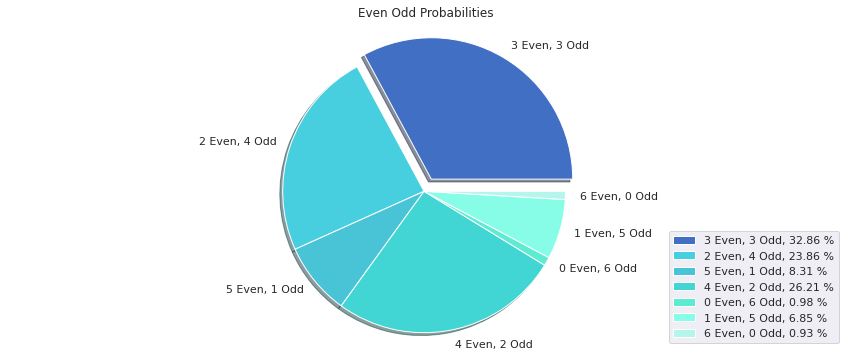

In [35]:
def getNumberOfEvenAndOdd(numbers):
    countEven = 0
    countOdd = 0
    for number in numbers:
        if number % 2 == 0:
            countEven += 1
        else:
            countOdd += 1
    return str(countEven) + " Even, " +str(countOdd) +" Odd"

def visualizeEvenOddCombination():
    even_odd = {}
    numbers = []
    
    for index, draw in lottery.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            numbers.append(int(draw['Ball 6']))
            even_odd[getNumberOfEvenAndOdd(numbers)] = even_odd.get(getNumberOfEvenAndOdd(numbers), 0) + 1 
            numbers = []
    
    even_odd_ser = pd.Series(even_odd)

    labels = even_odd.keys()
    sizes = list(even_odd.values())
    sizes = [x / float(len(lottery)) * 100 for x in sizes]
    explode = (0.1, 0, 0, 0, 0,0,0)
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    colors = ["#416fc4", "#48cfdf", "#48c4d6", "#41d6d3", "#5decd2", "#87fde8","#b4f6eb"]
    ax1.pie(sizes, explode=explode, labels=labels,colors = colors, shadow=True)
    plt.title("Even Odd Probabilities")
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')

    

visualizeEvenOddCombination()

#### Analysis
Around 33% of jackpots were formed from 3 even and 3 odd numbers.
Picking 3 even 3 odds have higher chances to win

### Hight - Low
- High numbers >= 22
- Low numbers < 22

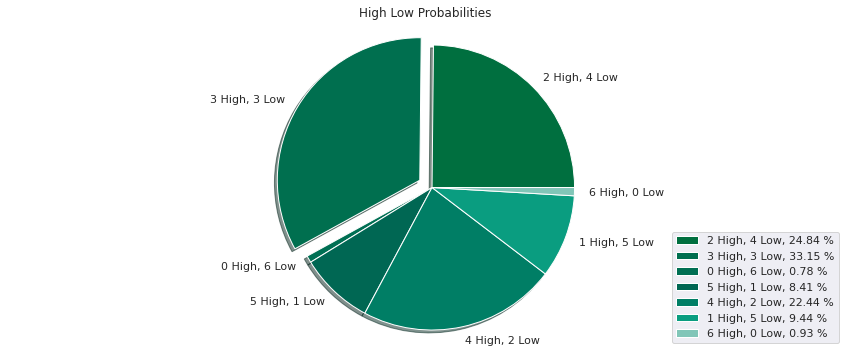

In [36]:
def getNumberOfHighAndLow(numbers):
    countHigh = 0
    countLow = 0
    for number in numbers:
        if number >= 22:
            countHigh += 1
        else:
            countLow += 1
    return str(countHigh) + " High, " +str(countLow) +" Low"

def visualizeHighLowCombination():
    high_low = {}
    numbers = []
    for index, draw in lottery.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            numbers.append(int(draw['Ball 6']))
            high_low[getNumberOfHighAndLow(numbers)] = high_low.get(getNumberOfHighAndLow(numbers), 0) + 1 
            numbers = []
    high_low_ser = pd.Series(high_low)

    labels = high_low.keys()
    sizes = list(high_low.values())
    sizes = [x / float(len(lottery)) * 100 for x in sizes]
    explode = (0.0, 0.1, 0, 0, 0,0,0)
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    colors = ["#006F3F", "#006F4F", "#006F53", "#006753", "#007e65", "#0a9d80","#81c6b8"]
    ax1.pie(sizes, explode=explode, labels=labels,colors = colors, shadow=True)
    plt.title("High Low Probabilities")
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')

    

visualizeHighLowCombination()

Around 33% of jackpots were formed from 3 high and 3 low numbers.

### Summing values
Steps to follow:

- Calculate the mean of distribution for each ball
- Find the sum of all means
- Evaluate the % of jackpots where the balls' sum falls around the mean (+ or - 29)

just divide the targets into two main parts: In Range & Out Of Range

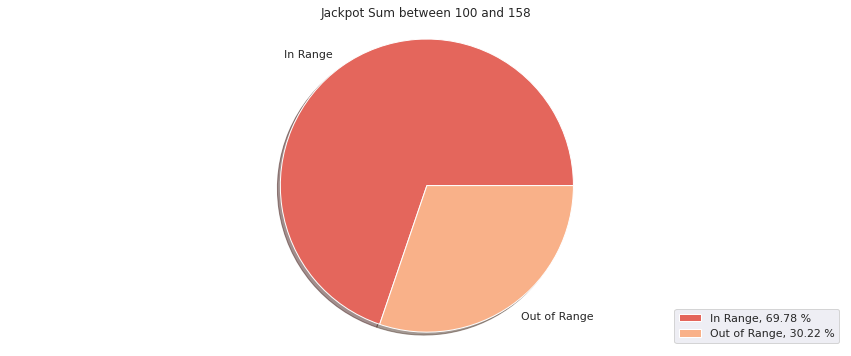

In [39]:
def getMean(ball_dist):
    mean = 0
    allOcc = 0
    for value in list(ball_dist.keys()):
        for occ in list(ball_dist.values):
            mean += value * occ
            allOcc += occ
    mean = mean/allOcc
    return mean

sumOfMeans = 0

for i in range(1,7):
    ball_dist = lottery['Ball ' +str(i)].value_counts().sort_index()
    sumOfMeans += getMean(ball_dist)

sumOfMeans = int(sumOfMeans)

def isNumbersInRange(numbers):
    sumOfNumbers = 0 
    for number in numbers:
        sumOfNumbers += number
    if (sumOfNumbers >= sumOfMeans - 29 and sumOfNumbers <= sumOfMeans + 29):
        return "In Range"
    else:
        return "Out of Range"    


def visualizeInRangeCombination():
    in_range = {}
    numbers = []
    
    for index, draw in lottery.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            numbers.append(int(draw['Ball 6']))
            in_range[isNumbersInRange(numbers)] = in_range.get(isNumbersInRange(numbers), 0) + 1 
            numbers = []

    in_range_ser = pd.Series(in_range)

    labels = in_range.keys()
    sizes = list(in_range.values())
    sizes = [x / float(len(lottery)) * 100 for x in sizes]
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    colors = ["#E4665C", "#F9B189"]
    ax1.pie(sizes, labels=labels, shadow=True, colors=colors)
    plt.title("Jackpot Sum between " + str(sumOfMeans - 29) + " and " + str(int(sumOfMeans + 29)))
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')

    

visualizeInRangeCombination()

if you choose to take 6 number whose sum will be between 100 and 158. That does not mean that you'll hit the jackpot 70% of the times. What that means is that 70% out of the jackpot is made out of 6 numbers whose sum falls between 100 and 158.

### DO NOT PICK ALL THREE METHODS TOGETHER!
P(A ∩ B ∩ C) = P(A) x P(B|A) x P(C|A ∩ B) ==> The more events you take into consideration the lesser your probabilty

# Prediction

In [8]:
from sklearn.preprocessing import StandardScaler

df = lottery[['Ball {}'.format(i) for i in range(1, 7)]]
scaler = StandardScaler().fit(df.values)
transformed_dataset = scaler.transform(df.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)

transformed_df.head()

,0,1,2,3,4,5
0,0.174248,2.013014,-1.069830,-2.368265,-1.632806,-0.960024
1,-0.244234,1.049425,-0.773199,2.580806,-1.477196,-1.767448
2,-0.453475,-0.395959,-0.031621,1.561879,0.856961,0.251111
3,0.383490,0.567630,-0.179937,-0.184852,-0.232312,-0.960024
4,-0.453475,-0.877754,-1.218146,-1.203778,-0.543533,0.856678


In [9]:
# All our games
number_of_rows = df.values.shape[0]
number_of_rows

2045

In [10]:
# Amount of games we need to take into consideration for prediction
window_length = 7
window_length

7

In [11]:
# Balls counts
number_of_features = df.values.shape[1]
number_of_features

6

In [12]:
X = np.empty([ number_of_rows - window_length, window_length, number_of_features], dtype=float)
y = np.empty([ number_of_rows - window_length, number_of_features], dtype=float)
for i in range(0, number_of_rows-window_length):
    X[i] = transformed_df.iloc[i : i+window_length, 0 : number_of_features]
    y[i] = transformed_df.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [13]:
X.shape, y.shape

((2038, 7, 6), (2038, 6))

In [14]:
X[0], y[0]

(array([[ 0.17424833,  2.01301405, -1.06983048, -2.36826525, -1.63280629,
         -0.96002447],
        [-0.24423415,  1.04942483, -0.77319929,  2.58080553, -1.47719585,
         -1.76744789],
        [-0.45347538, -0.39595899, -0.03162132,  1.56187919,  0.85696078,
          0.25111066],
        [ 0.38348956,  0.56763022, -0.17993691, -0.18485167, -0.23231231,
         -0.96002447],
        [-0.45347538, -0.8777536 , -1.21814608, -1.20377801, -0.5435332 ,
          0.85667822],
        [ 1.01121327,  0.24643382, -0.32825251, -0.33041258, -0.38792276,
         -1.36373618],
        [ 1.63893698,  0.40703202, -0.03162132,  0.25183104, -0.38792276,
         -0.35445691]]),
 array([ 0.38348956,  0.24643382,  0.11669427, -0.33041258,  0.07890857,
         0.0492548 ]))

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))

model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))

model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))

model.add(layers.Bidirectional(layers.LSTM(240, input_shape = (window_length, number_of_features), return_sequences = False)))

model.add(layers.Dense(number_of_features))

In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss ='mse', metrics=['accuracy'])

In [ ]:
model.fit(x=X, y=y, batch_size=100, epochs=300, verbose=2)

In [18]:
to_predict = df.tail(8)
to_predict

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6
2037,2,14,18,36,39,41
2038,7,8,16,31,38,41
2039,8,11,14,15,18,23
2040,3,15,18,20,35,38
2041,1,9,19,22,36,37
2042,2,17,18,33,34,37
2043,5,9,14,32,33,34
2044,3,4,5,28,34,41


In [19]:
to_predict.drop([to_predict.index[-1]],axis=0, inplace=True)
to_predict

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6
2037,2,14,18,36,39,41
2038,7,8,16,31,38,41
2039,8,11,14,15,18,23
2040,3,15,18,20,35,38
2041,1,9,19,22,36,37
2042,2,17,18,33,34,37
2043,5,9,14,32,33,34


In [20]:
to_predict = np.array(to_predict)
to_predict

array([[ 2, 14, 18, 36, 39, 41],
       [ 7,  8, 16, 31, 38, 41],
       [ 8, 11, 14, 15, 18, 23],
       [ 3, 15, 18, 20, 35, 38],
       [ 1,  9, 19, 22, 36, 37],
       [ 2, 17, 18, 33, 34, 37],
       [ 5,  9, 14, 32, 33, 34]])

In [21]:
prediction = df.tail(1)
prediction

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6
2044,3,4,5,28,34,41


In [22]:
scaled_to_predict = scaler.transform(to_predict)
scaled_to_predict

array([[-0.87195786,  0.24643382, -0.03162132,  1.7074401 ,  1.32379211,
         0.85667822],
       [ 0.17424833, -0.7171554 , -0.32825251,  0.97963557,  1.16818167,
         0.85667822],
       [ 0.38348956, -0.23536079, -0.6248837 , -1.34933891, -1.94402718,
        -2.77672716],
       [-0.66271662,  0.40703202, -0.03162132, -0.62153439,  0.70135034,
         0.25111066],
       [-1.0811991 , -0.55655719,  0.11669427, -0.33041258,  0.85696078,
         0.0492548 ],
       [-0.87195786,  0.72822843, -0.03162132,  1.27075738,  0.5457399 ,
         0.0492548 ],
       [-0.24423415, -0.55655719, -0.6248837 ,  1.12519647,  0.39012946,
        -0.55631276]])

In [23]:
y_pred = model.predict(np.array([scaled_to_predict]))
print("The predicted numbers in the last lottery game are:", scaler.inverse_transform(y_pred).astype(int)[0])

The predicted numbers in the last lottery game are: [ 3  4  5 28 34 41]


In [24]:
prediction = np.array(prediction)
print("The actual numbers in the last lottery game were:", prediction[0])

The actual numbers in the last lottery game were: [ 3  4  5 28 34 41]
